In [1]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

Cargar los datos en un dataframe llamado: airbnb

In [5]:
airbnb<-read.csv('airbnb.csv',sep = ',', stringsAsFactor=T)

Mostrar las primeras 6 filas del dataframe

In [6]:
head(airbnb)

,Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

In [7]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")
colnames(airbnb)<-newnames

Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

In [8]:
airbnb$MetrosCuadrados<-airbnb$PiesCuadrados*0.092903

In [9]:
colnames(airbnb)

[1] "CodigoPostal"    "Barrio"          "TipoPropiedad"   "TipoAlquiler"   
 [5] "MaxOcupantes"    "NumBanyos"       "NumDormitorios"  "NumCamas"       
 [9] "TipoCama"        "Comodidades"     "PiesCuadrados"   "Precio"         
[13] "Puntuacion"      "MetrosCuadrados"

Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

In [10]:
table(airbnb$CodigoPostal)


                        -        20013        20126         2015        25008 
         439            1            1            1            1            1 
       27004        27013           28        28001       280013        28002 
           1            1            1          231            1          170 
28002\n28002        28003        28004        28005        28006        28007 
           1          185         1794         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1019 
       28014        28015        28016        28017        28018        28019 
         630          600           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         192           58           30           23           44          123 
       28026        28027        28028        28029

In [11]:
##Primero los cambios de numero
airbnb$CodigoPostal[airbnb$CodigoPostal=='2805']<-'28005'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2804']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2815']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='2015']<-'28015'
airbnb$CodigoPostal[airbnb$CodigoPostal=='280013']<-'28013'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28']<-NA

## Grandes
airbnb$CodigoPostal[airbnb$CodigoPostal=='Madrid 28004']<-'28004'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28002\n28002']<-'28002'
airbnb$CodigoPostal[airbnb$CodigoPostal=='28051\n28051']<-'28051'

## Raros
airbnb$CodigoPostal[airbnb$CodigoPostal=='']<-NA  
airbnb$CodigoPostal[airbnb$CodigoPostal=='-']<-NA

## Distintos que 28
airbnb$CodigoPostal[!grepl("^28",airbnb$CodigoPostal)]<-NA

## Convertimos en factor
airbnb$CodigoPostal<-factor(airbnb$CodigoPostal)

In [12]:
table(airbnb$CodigoPostal)


28001 28002 28003 28004 28005 28006 28007 28008 28009 28010 28011 28012 28013 
  231   171   185  1796  1195   218   206   338   216   384   250  2060  1020 
28014 28015 28016 28017 28018 28019 28020 28021 28022 28023 28024 28025 28026 
  630   602    76   107    43   200   192    58    30    23    44   123    93 
28027 28028 28029 28030 28031 28032 28033 28034 28035 28036 28037 28038 28039 
  122   263   110    73    27    33    89    45    59    67    65    77   160 
28040 28041 28042 28043 28044 28045 28046 28047 28048 28049 28050 28051 28052 
   16    63    90   103    19   495    32    67     1     3    58    17     1 
28053 28054 28055 28056 28058 28060 28094 28105 28850 
   85    12    12     1     1     1     1     1     1 

Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

In [13]:
paste("Los codigos postales que tenemos son:")
na.omit(unique(airbnb$CodigoPostal))

paste("El numero total de codigos postales distintos que tenemos son:",length(unique(airbnb$CodigoPostal)))

[1] "Los codigos postales que tenemos son:"

[1] 28004 28015 28013 28005 28012 28014 28045 28007 28028 28009 28001 28006
[13] 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025 28019
[25] 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026 28058
[37] 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022 28042
[49] 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056 28060
[61] 28052
attr(,"na.action")
[1] 8
attr(,"class")
[1] omit
61 Levels: 28001 28002 28003 28004 28005 28006 28007 28008 28009 ... 28850

[1] "El numero total de codigos postales distintos que tenemos son: 62"

¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

In [14]:
paste("Los 5 codigos con mas entradas y su numero de entradas debajo son:")
head(sort(table(airbnb$CodigoPostal),decreasing = T),5)

paste("Los 5 codigos con menos entradas y su numero de entradas debajo son:")
head(sort(table(airbnb$CodigoPostal),decreasing = F),5)


[1] "Los 5 codigos con mas entradas y su numero de entradas debajo son:"


28012 28004 28005 28013 28014 
 2060  1796  1195  1020   630 

[1] "Los 5 codigos con menos entradas y su numero de entradas debajo son:"


28048 28052 28056 28058 28060 
    1     1     1     1     1 

¿Cuales son los barrios que hay en el código postal 28012?

In [15]:
print("Los barrios que existen en el codigo postal 28012 son:")
unique(airbnb[which(airbnb$CodigoPostal=='28012'),]$Barrio)

[1] "Los barrios que existen en el codigo postal 28012 son:"


[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... Zofío

¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012? 

In [17]:
entradas_28012<-airbnb[which(airbnb$CodigoPostal=='28012'),]
entradas_28012$Barrio<-factor(entradas_28012$Barrio)
paste("Los barrios del codigo postal 28012 y debajo el numero de entradas de cada uno es:")
table(entradas_28012$Barrio)

[1] "Los barrios del codigo postal 28012 y debajo el numero de entradas de cada uno es:"


        Acacias        Arapiles          Atocha          Cortes        Delicias 
             13               1               1             216               1 
    Embajadores            Goya         Palacio Palos de Moguer             Sol 
           1449               1              27              46             301 
    Universidad 
              4 

¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

In [42]:
paste("En todo el dataset tenemos el siguiente numero de barrios=",length(unique(airbnb$Barrio)))
paste("los barrios son:")
unique(airbnb$Barrio)

[1] "En todo el dataset tenemos el siguiente numero de barrios= 125"

[1] "los barrios son:"

[1] Universidad                  Sol                         
  [3] Imperial                     Acacias                     
  [5] Chopera                      Delicias                    
  [7] Palos de Moguer              Embajadores                 
  [9] Cortes                       Atocha                      
 [11] Pacífico                     Adelfas                     
 [13] Estrella                     Ibiza                       
 [15] Jerónimos                    Niño Jesús                  
 [17] Palacio                      Justicia                    
 [19] Recoletos                    Goya                        
 [21] Fuente del Berro             Arapiles                    
 [23] Trafalgar                    Almagro                     
 [25] Guindalera                   Lista                       
 [27] Castellana                   El Viso                     
 [29] Prosperidad                  Valverde                    
 [31] Casa de Campo                El Goloso                   
 [33] Numancia                     Cármenes                    
 [35] Puerta del Angel             Lucero                      
 [37] Aluche                       San Isidro                  
 [39] Campamento                   Comillas                    
 [41] Opañel                       Vista Alegre                
 [43] Ciudad Jardín                Hispanoamérica              
 [45] Nueva España                 Castilla                    
 [47] Bellas Vistas                Cuatro Caminos              
 [49] Castillejos                  Vallehermoso                
 [51] Almenara                     Valdeacederas               
 [53] Berruguete                   Gaztambide                  
 [55] Rios Rosas                   Peñagrande                  
 [57] Argüelles                    Puerta Bonita               
 [59] Buenavista                   Abrantes                    
 [61] Orcasur                      San Fermín                  
 [63] Almendrales                  Pradolongo                  
 [65] Portazgo                     Entrevías                   
 [67] San Diego                    Palomeras Bajas             
 [69] Fontarrón                    Vinateros                   
 [71] Ventas                       Pueblo Nuevo                
 [73] Quintana                     Concepción                  
 [75] San Juan Bautista            Costillares                 
 [77] Piovera                      Canillas                    
 [79] Pinar del Rey                Apostol Santiago            
 [81] San Andrés                   Valdefuentes                
 [83] Butarque                     Los Angeles                 
 [85] Casco Histórico de Vicálvaro Simancas                    
 [87] Rejas                        Salvador                    
 [89] Casco Histórico de Barajas   Pilar                       
 [91] La Paz                       Mirasierra                  
 [93] Ciudad Universitaria         Moscardó                    
 [95] Palomeras Sureste            Marroquina                  
 [97] Media Legua                  Los Rosales                 
 [99] Casco Histórico de Vallecas  Timón                       
[101] Corralejos                   Cuatro Vientos              
[103] Colina                       San Cristobal               
[105] Alameda de Osuna             Aeropuerto                  
[107] Palomas                      Zofío                       
[109] Aguilas                      Legazpi                     
[111] Fuentelareina                Aravaca                     
[113] Ambroz                       Canillejas                  
[115] Valdezarza                   Amposta                     
[117] San Pascual                  Santa Eugenia               
[119] Arcos                        Rosas                       
[121] Valdemarín                   El Plantío                  
[123] Hellín                       Pavones                     
[125] Orcasitas                   

¿Cuales son los 5 barrios que tienen mayor número entradas?

In [43]:
paste("los barrios con mayor numero de entradas son y sus entradas debajo son:")
head(sort(table(airbnb$Barrio),decreasing = T),5)

[1] "los barrios con mayor numero de entradas son y sus entradas debajo son:"


Embajadores Universidad     Palacio         Sol    Justicia 
       1844        1358        1083         940         785 

¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

In [44]:
paste("En todo el dataset tenemos",length(unique(airbnb$TipoAlquiler)),"tipos de alquiler=")

paste("En todo el dataset tenemos los siguientes tipos de alquiler=\n")
unique(airbnb$TipoAlquiler)

paste("En todo el dataset tenemos las siguientes entradas por cada tipo de alquiler=\n")
table(airbnb$TipoAlquiler)


[1] "En todo el dataset tenemos 3 tipos de alquiler="

[1] "En todo el dataset tenemos los siguientes tipos de alquiler=\n"

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

[1] "En todo el dataset tenemos las siguientes entradas por cada tipo de alquiler=\n"


Entire home/apt    Private room     Shared room 
           7903            5113             191 

Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Warning message:
“Removed 9 rows containing non-finite values (`stat_boxplot()`).”


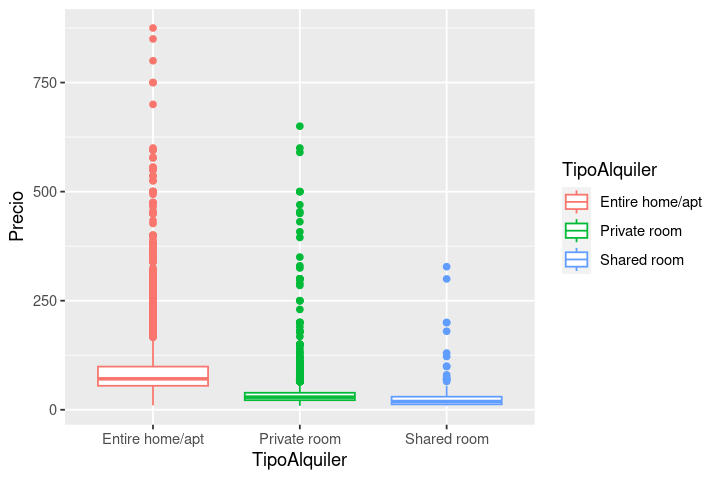

In [45]:
library(ggplot2)
ggplot(airbnb,aes(y=Precio,x=TipoAlquiler,color=TipoAlquiler))+geom_boxplot()

Cual es el precio medio de alquiler medio de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

In [52]:
## Primero hacemos la prueba de shapiro dado que es una prueba de normalidad

for (tipo in levels(airbnb$TipoAlquiler)){
    df<-subset(airbnb,TipoAlquiler==tipo)
    print(paste("Precio medio para",tipo," = ",mean(df$Precio,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$Precio)
    print(paste("Shapiro pvalor = ",sp$p.value))
}

#Como no sigue una normal rechazamos hipotesis nula y realizamos un test de Kruskal-Wallis
##La prueba de Kruskal-Wallis es una prueba no paramétrica 
##utilizada para comparar tres o más grupos independientes. 
##En lugar de utilizar las medias y desviaciones estándar,
##esta prueba se basa en los rangos de los datos y no requiere la suposición de una distribución normal.

kt<-kruskal.test(Precio~TipoAlquiler,airbnb)

paste("El pvalor es:",kt$p.value, "Debido a ello la diferencia entre las medias es significativa ")

##Si el valor p es menor que un umbral de significancia previamente definido (por ejemplo, 0.05)
##podemos concluir que hay una diferencia estadísticamente significativa entre los precios medios de alquiler
##para los diferentes tipos de alquiler

[1] "Precio medio para Entire home/apt  =  87.2966058763931"
[1] "Shapiro pvalor =  1.24077898621874e-72"
[1] "Precio medio para Private room  =  34.255135981217"
[1] "Shapiro pvalor =  9.18974842339072e-85"
[1] "Precio medio para Shared room  =  29.8534031413613"
[1] "Shapiro pvalor =  4.51672121600842e-24"


[1] "El pvalor es: 0 Debido a ello la diferencia entre las medias es significativa "

Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

In [53]:
airbnb_entire<-subset(airbnb,TipoAlquiler=='Entire home/apt')

¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire

In [54]:
paste("Los barrios con mayor numero de apartamentos alquilados son:")
head(sort(table(airbnb_entire$Barrio),decreasing = T),5)

[1] "Los barrios con mayor numero de apartamentos alquilados son:"


Embajadores Universidad     Palacio         Sol      Cortes 
       1228         984         769         701         574 

¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros?

¿Cual es su precio medio?
Ayuda: Usa la función aggregate

In [55]:
mean_price<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","Precio")], mean,na.rm=TRUE)
dim(mean_price)
mean_price<-mean_price[order(mean_price$Precio,decreasing = T),]

paste("Estos son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros y su precio medio")

head(mean_price,5)
barrios<-head(mean_price,5)$Barrio

[1] 119   2

[1] "Estos son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros y su precio medio"

,Barrio,Precio
,<fct>,<dbl>
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El Plantío,150.0000
30,Castellana,141.3889


¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

In [56]:
count_value<-data.frame(table(airbnb_entire$Barrio))
colnames(count_value)<-c("Barrio","Freq")
mean_price<-merge(count_value,mean_price,by="Barrio")
paste("Estos son los 5 barrios que tienen un mayor precio medio, su precio medio y frequencia")
mean_price<-mean_price[order(mean_price$Precio,decreasing = T),]
head(mean_price,5)

[1] "Estos son los 5 barrios que tienen un mayor precio medio, su precio medio y frequencia"

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.7500
50,Fuentelareina,2,180.0000
93,Recoletos,135,161.9254
43,El Plantío,1,150.0000
30,Castellana,73,141.3889


In [57]:
## Vemos que pisos tenemos y frecuencia
mean_price

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
77,Palomas,4,309.75000
50,Fuentelareina,2,180.00000
93,Recoletos,135,161.92537
43,El Plantío,1,150.00000
30,Castellana,73,141.38889
27,Casco Histórico de Barajas,8,141.25000
6,Alameda de Osuna,4,138.75000
35,Ciudad Universitaria,13,138.30769
58,Jerónimos,62,131.82258


Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

In [62]:
mean_price_100<-subset(mean_price,mean_price$Freq>100)
paste("los 5 barrios con mas de 100 entradas y mayor precio medio son:")
head(mean_price_100,5)

[1] "los 5 barrios con mas de 100 entradas y mayor precio medio son:"

,Barrio,Freq,Precio
,<fct>,<int>,<dbl>
93,Recoletos,135,161.92537
52,Goya,142,111.33803
106,Sol,701,100.75036
108,Trafalgar,223,98.57848
59,Justicia,534,98.25468


Dibuja el diagrama de densidad de distribución de los diferentes precios

Warning message:
“Removed 1 rows containing non-finite values (`stat_density()`).”


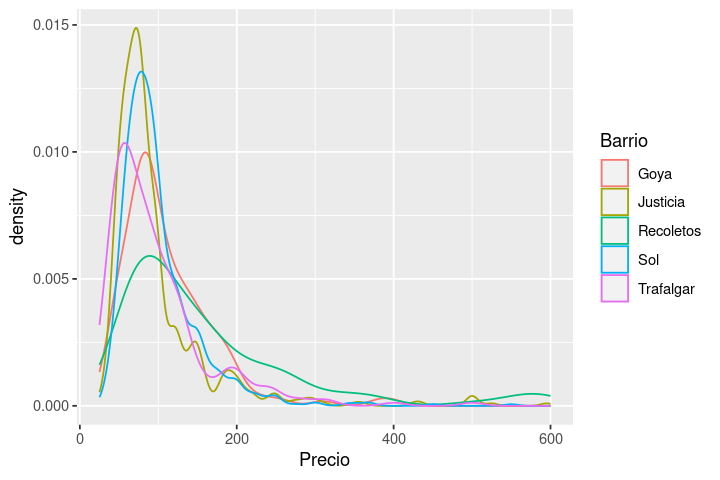

In [67]:
top_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=Precio,color=Barrio))+geom_density()


Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

In [66]:
mean_size<-aggregate(. ~ Barrio, airbnb_entire[c("Barrio","MetrosCuadrados")], mean,na.rm=TRUE)
mean_price_size_100<-merge(mean_price_100,mean_size,by="Barrio")

mean_price_size_100<-mean_price_size_100[order(mean_price_size_100$Precio,decreasing = T),]
head(mean_price_size_100,5)

,Barrio,Freq,Precio,MetrosCuadrados
,<fct>,<int>,<dbl>,<dbl>
8,Recoletos,135,161.92537,26.66316
4,Goya,142,111.33803,51.68504
9,Sol,701,100.75036,45.61692
10,Trafalgar,223,98.57848,29.30426
5,Justicia,534,98.25468,28.52669


Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos

Warning message:
“Removed 1645 rows containing non-finite values (`stat_density()`).”


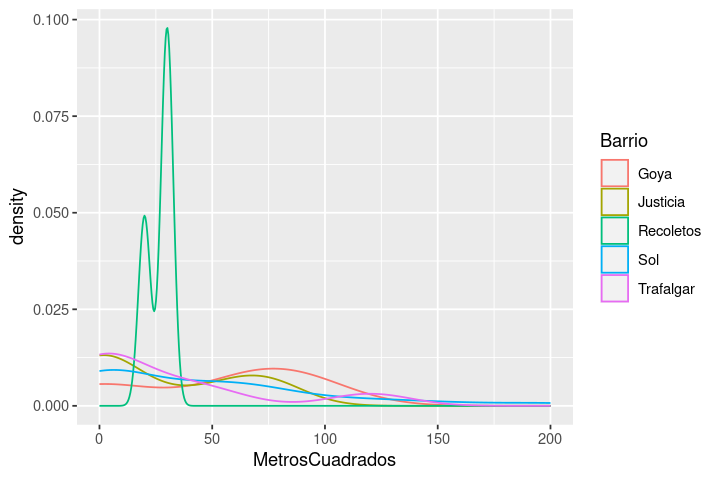

In [68]:
tamaño_barrios<-subset(airbnb_entire,Barrio %in% barrios)
ggplot(top_barrios,aes(x=MetrosCuadrados,color=Barrio))+geom_density()

Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

In [72]:
##Aplicamos mismo procedimiento que antes comprobando primero la normalidad con shaphiro 

for (barrio in unique(top_barrios$Barrio)){
    df<-top_barrios[which(top_barrios$Barrio==as.character(barrio)),]
    print(paste("Precio medio de",barrio," = ",mean(df$MetrosCuadrados,na.rm=T)))
    if (nrow(df)>5000){
        df<-df[1:5000,]
    }
    sp<-shapiro.test(df$MetrosCuadrados)
    print(paste("Shapiro pvalor = ",sp$p.value))
}

### Vemos que no, usamos prueba no parametrica como antes Kruskal-Wallis

kt<-kruskal.test(MetrosCuadrados~Barrio,top_barrios)
paste("Dado el siguiente pvvalor ",kt$p.value,"En esta ocasion ocurre justo lo contrario el p valor es alto con lo que las medias no son estadisticamente significantes")



[1] "Precio medio de Sol  =  45.6169213833333"
[1] "Shapiro pvalor =  8.6913775134728e-07"
[1] "Precio medio de Justicia  =  28.5266858823529"
[1] "Shapiro pvalor =  0.00064192630271212"
[1] "Precio medio de Recoletos  =  26.663161"
[1] "Shapiro pvalor =  0"
[1] "Precio medio de Goya  =  51.6850356666667"
[1] "Shapiro pvalor =  0.519924091564745"
[1] "Precio medio de Trafalgar  =  29.3042605714286"
[1] "Shapiro pvalor =  0.0127581397426826"


[1] "Dado el siguiente pvvalor  0.757443581555649 En esta ocasion ocurre justo lo contrario el p valor es alto con lo que las medias no son estadisticamente significantes"

Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

In [75]:
barrio_Sol<-subset(airbnb_entire,Barrio=="Sol")
paste("Entradas=",nrow(barrio_Sol))

[1] "Cuantas entradas= 701"

Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

In [77]:
cor(barrio_Sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.6761906,0.6578162,0.4820549
NumDormitorios,0.6761906,1.0000000,0.7594598,0.5684521
MaxOcupantes,0.6578162,0.7594598,1.0000000,0.4286233
MetrosCuadrados,0.4820549,0.5684521,0.4286233,1.0000000


Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Warning message:
“Removed 641 rows containing non-finite values (`stat_density()`).”


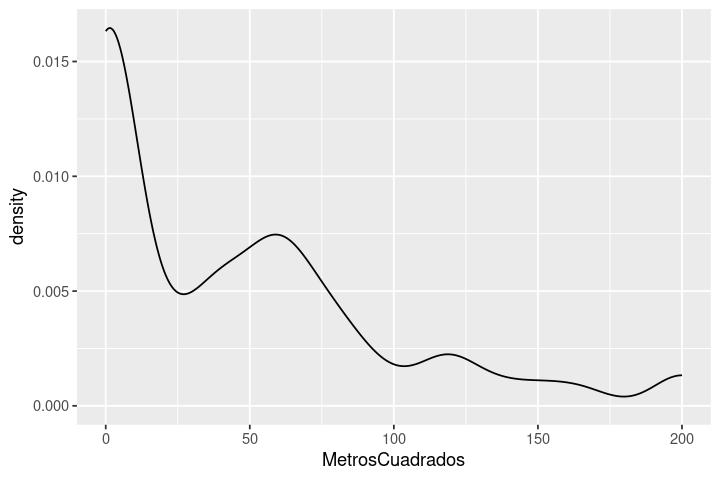

In [84]:
ggplot(barrio_Sol,aes(x=MetrosCuadrados))+geom_density(bw=10)

In [85]:
## Seleccionamos mayores de 25m2 
barrio_Sol<-subset(barrio_Sol, MetrosCuadrados>25)
paste("Tenemos las siguientes entrads:",nrow(barrio_Sol))

[1] "Tenemos las siguientes entrads: 32"

In [89]:
# Con estos datos nuevos las correlaciones parecen tener más sentido
barrio_Sol<-subset(airbnb_entire,Barrio=="Sol" & MetrosCuadrados>15)
cor(barrio_Sol[,c("NumBanyos","NumDormitorios","MaxOcupantes","MetrosCuadrados")],use="pairwise.complete.obs")

,NumBanyos,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.7292599,0.8589205,0.6113095
NumDormitorios,0.7292599,1.0000000,0.7855310,0.8215065
MaxOcupantes,0.8589205,0.7855310,1.0000000,0.7121088
MetrosCuadrados,0.6113095,0.8215065,0.7121088,1.0000000


Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

In [90]:
## Para ello previamente observamos que los valores estan bien, y generamos un modelo con nuestras variables
model<-lm(barrio_Sol,formula=Precio~NumBanyos+NumDormitorios+MetrosCuadrados+MaxOcupantes)
summary(model)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MetrosCuadrados + 
    MaxOcupantes, data = barrio_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-76.852 -13.673  -5.048  18.523  69.473 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      28.0362    12.9584   2.164  0.03859 * 
NumBanyos         0.5647    14.6038   0.039  0.96941   
NumDormitorios   28.2119     8.5440   3.302  0.00249 **
MetrosCuadrados   0.2237     0.2050   1.091  0.28393   
MaxOcupantes      2.6738     4.4329   0.603  0.55093   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.32 on 30 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7267 
F-statistic:  23.6 on 4 and 30 DF,  p-value: 6.728e-09


In [92]:
## Ahora comprobamos las relaciones entre ellas Precio - Metros cuadrados
model<-lm(barrio_Sol,formula=Precio~MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ MetrosCuadrados, data = barrio_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-65.154 -18.405  -0.139   9.146 122.102 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      30.9151    12.6752   2.439   0.0203 *  
MetrosCuadrados   0.9796     0.1404   6.978  5.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 38.65 on 33 degrees of freedom
Multiple R-squared:  0.5961,	Adjusted R-squared:  0.5838 
F-statistic:  48.7 on 1 and 33 DF,  p-value: 5.596e-08


In [94]:
## Ahora comprobamos las relaciones entre ellas Precio - Habitaciones
model<-lm(barrio_Sol,formula=Precio~NumDormitorios)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios, data = barrio_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-89.704 -17.010  -5.768  19.490  61.296 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)      41.283      8.554   4.826 3.08e-05 ***
NumDormitorios   39.484      4.078   9.682 3.61e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 31.03 on 33 degrees of freedom
Multiple R-squared:  0.7396,	Adjusted R-squared:  0.7317 
F-statistic: 93.75 on 1 and 33 DF,  p-value: 3.611e-11


In [96]:
## Ahora comprobamos las relaciones entre Habitaciones y Metros cuadrados
model<-lm(barrio_Sol,formula=Precio~NumDormitorios+MetrosCuadrados)
summary(model)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_Sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.701 -15.056  -4.442  17.341  68.125 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      34.0916    10.0930   3.378  0.00193 ** 
NumDormitorios   31.8817     7.0761   4.506 8.31e-05 ***
MetrosCuadrados   0.2558     0.1956   1.308  0.20025    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 30.7 on 32 degrees of freedom
Multiple R-squared:  0.7528,	Adjusted R-squared:  0.7374 
F-statistic: 48.74 on 2 and 32 DF,  p-value: 1.938e-10


¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

In [ ]:
## Seria el numero de habitaciones si comprobamos el valor de F es de los mas elevados,
## Ademas tiene tambien mucha relacion con los Metros cuadrados por su estadisticos tambien
## Mientras que el precio no esta nada correlacionado viendo sus valores

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

In [98]:
## Primero seleccionamos las variables y creamos modelo

model<-lm(barrio_Sol,formula=Precio~MetrosCuadrados)

##confint nos da valores de una variable con sus intervalos de confianza

confint(model)["MetrosCuadrados",]

2.5 %    97.5 % 
0.6940201 1.2652501

Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

In [100]:
## Mismo que antes

model<-lm(barrio_Sol,formula=Precio~NumDormitorios)
confint(model)["NumDormitorios",]

2.5 %   97.5 % 
31.18746 47.78095

¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el intervalo de confianza de esa probabilidad?

In [105]:
## Laplace, la proabilidad sera el cociente entre la probabilidad del suceso
##didividad entre el total de proabiblidades
# Numero de anuncios con 3 dormitorios en Sol:
anuncios_3dormitorios_sol<-sum(barrio_Sol$NumDormitorios==3)

# Numero total de anuncios en Sol:
total<-nrow(barrio_Sol)

print(paste("La probabilidad es:",anuncios_3dormitorios_sol/total))

print("El margen de confianza es:")
binom.test(anuncios_3dormitorios_sol,total)$conf

[1] "La probabilidad es: 0.0857142857142857"
[1] "El margen de confianza es:"


[1] 0.01803764 0.23057502
attr(,"conf.level")
[1] 0.95